# 机器学习实验一——线性基函数回归

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

## 第一部分——生成数据级

In [23]:
S_SIZE = 10
M_SIZE = 30
L_SIZE = 60

RANAGE = 5
RANAGE_2 = 10

T_S_SIZE = 20
T_M_SIZE = 40
T_L_SIZE = 80


get_data函数通过数据集的取值范围（range, size）,得到对应的（x, y）

get_p函数得到数据的图像，X, Y为训练集，t_x,t_y为测试集

In [24]:
def get_data(ranage, size):
    x = np.random.uniform(low=-ranage, high=ranage, size=size)
    y = np.sin(0.5 * x) * 2 + np.random.normal(scale=0.5, size=x.shape)
    return x, y


In [25]:
S_x, S_y = get_data(RANAGE, S_SIZE)
M_x, M_y = get_data(RANAGE, M_SIZE)
L_x, L_y = get_data(RANAGE, L_SIZE)

T_S_x, T_S_y = get_data(RANAGE_2, T_S_SIZE)
T_M_x, T_M_y = get_data(RANAGE_2, T_M_SIZE)
T_L_x, T_L_y = get_data(RANAGE_2, T_L_SIZE)

In [26]:
def get_p(X, Y, t_x, t_y):
    plt.figure()
    #  sin函数
    x = np.linspace(-10, 10, 1000, endpoint=True)
    s = np.sin(0.5 * x)
    plt.plot(x, 2 * s, c='green', linewidth=2, label='sin')
    plt.axvline(x=-5, color='black', linestyle='--')
    plt.axvline(x=5, color='black', linestyle='--')
    plt.scatter(X, Y, c='black', label='training Data')
    plt.scatter(t_x, t_y, c='red', label='test data')

    plt.legend()
    plt.show()


## 第二部分——基函数回归模型

基函数回归模型，输入训练集、测试集、k值；返回预测值和RMSE；
对输入的x做基函数变换，基函数是K-1阶多项式

通过极大似然法由训练集得到𝐰MLE = 𝚽⊤𝚽 −1𝚽⊤𝐲

测试集与W矩阵乘法得到预测值

预测值与真实值的平方和除于数据大小得到RMSE


In [27]:
def module(x_train, y_train, x_test, y_test, k):
    x_train_poly = np.column_stack([x_train ** i for i in range(0, k)])
    x_test_poly = np.column_stack([x_test ** i for i in range(0, k)])
    W = np.linalg.inv(x_train_poly.T @ x_train_poly) @ x_train_poly.T @ y_train
    y_pred = x_test_poly @ W
    RMSE = (np.sum((y_test - y_pred) ** 2)) / y_test.size
    return y_pred, RMSE


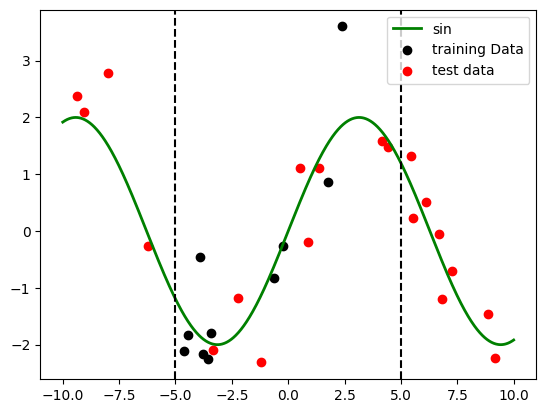

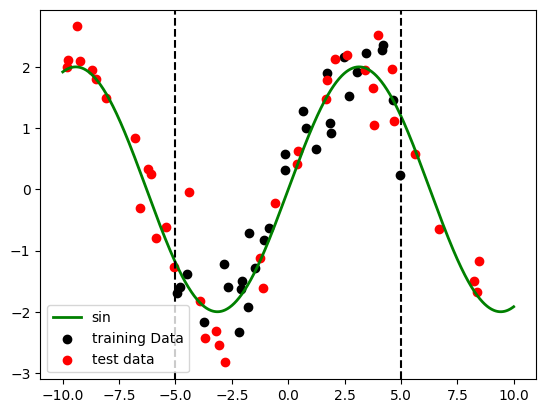

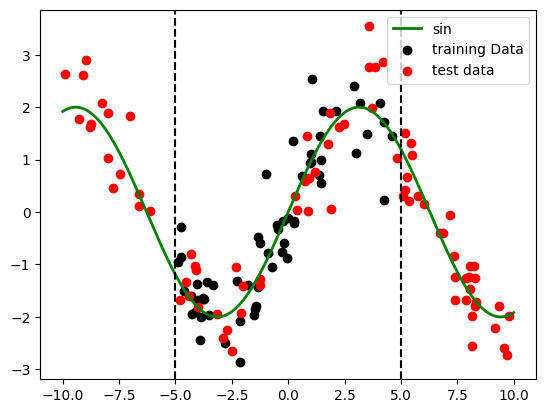

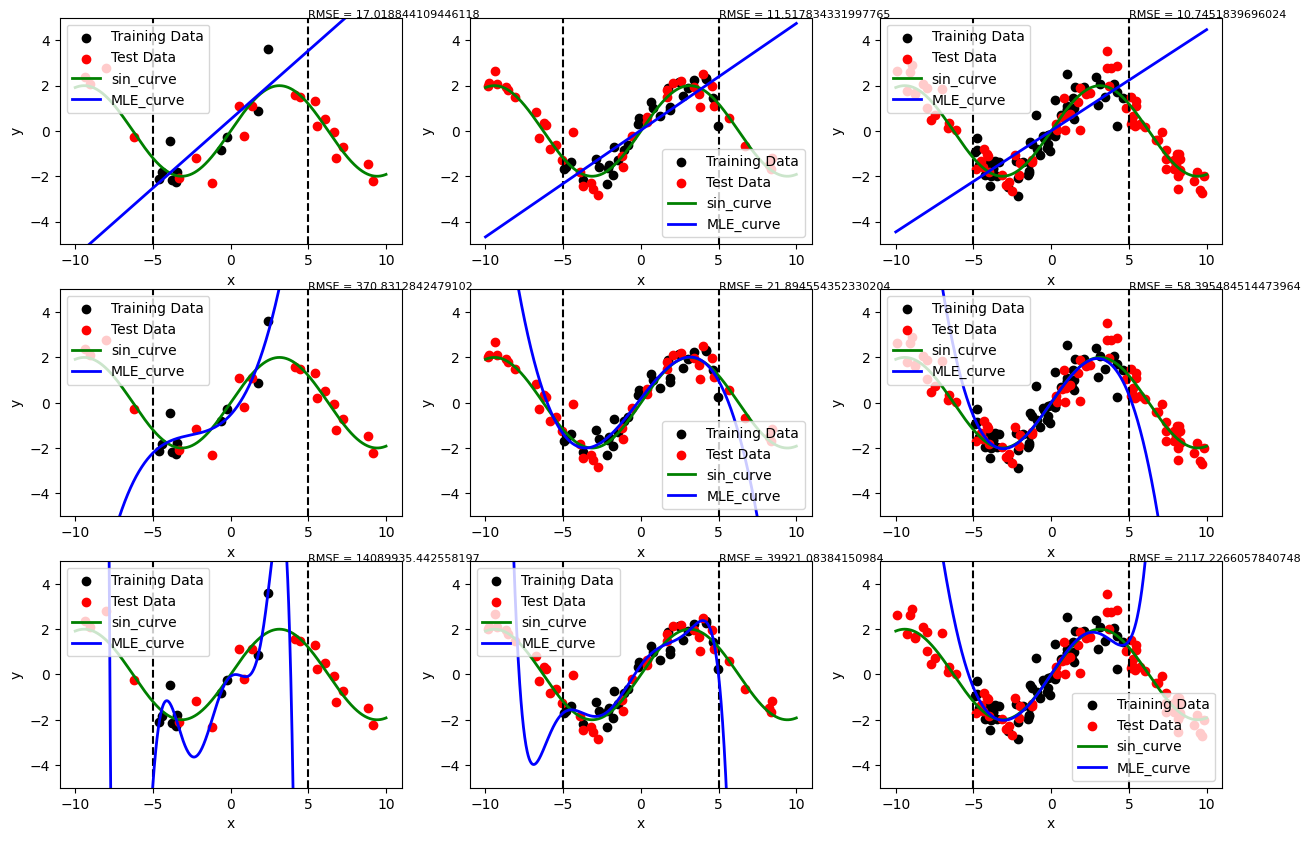

In [28]:
if __name__ == "__main__":
    #  任务一
    for x_train, y_train, x_test, y_test in zip([S_x, M_x, L_x], [S_y, M_y, L_y], [T_S_x, T_M_x, T_L_x],
                                                       [T_S_y, T_M_y, T_L_y]):
        get_p(x_train, y_train, x_test, y_test)

    #  任务二
    fig, axs = plt.subplots(3, 3, figsize=(15, 10))
    axs = axs.ravel()
    colors = ['black', 'r', 'g', 'c', 'b']
    i = 0

    for K in [2, 4, 8]:
        for x_train, y_train, x_test, y_test, label in zip([S_x, M_x, L_x], [S_y, M_y, L_y], [T_S_x, T_M_x, T_L_x],
                                                           [T_S_y, T_M_y, T_L_y], ['S', 'M', 'L']):
            X_PRED = np.linspace(-10, 10, 1000)
            Y_PRED = np.sin(0.5 * X_PRED) * 2 + np.random.normal(scale=0.5, size=X_PRED.shape)
            x_pred = X_PRED
            #  调用模型
            y_pred, RMSE = module(x_train, y_train, X_PRED, Y_PRED, K)
            ax = axs[i]
            i = i+1

            ax.scatter(x_train, y_train, color=colors[0], label='Training Data')
            ax.scatter(x_test, y_test, color=colors[1], label='Test Data')
            x = np.linspace(-10, 10, 1000, endpoint=True)
            s = np.sin(0.5 * x)
            ax.axvline(x=-5, color=colors[0], linestyle='--')
            ax.axvline(x=5, color=colors[0], linestyle='--')

            ax.plot(x, 2 * s, c='green', linewidth=2, label='sin_curve')
            ax.plot(x_pred, y_pred, c=colors[4], linewidth=2, label='MLE_curve')

            ax.text(5, 5, f'RMSE = {RMSE}', fontsize=8)
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.legend()
            ax.set_ylim(-5, 5)
    plt.show()
